## Meteoric Data from Weather Stations:
- Town Creek  
- Bogus  
- Mores Creek Snotel  
- WRF  

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors

In [2]:
swe = pd.read_csv('../Data/3.swe_daily_site7_wrf.csv',parse_dates = [0])
acm = pd.read_csv('../Data/4.ACPRCP_daily_site7_wrf.csv',parse_dates = [0]) #precip accum at site 7 using wrf
temp = pd.read_csv('../Data/5.Temp_daily_site7_wrf.csv',parse_dates = [0])
temp['T2'] = temp['T2'] - 273.15
swe_snotel = pd.read_csv('../Data/6.swe_daily_snotel.csv',parse_dates = [0])
swe_snotel.columns

Index(['Site Id', 'timestamp', 'SWE1', 'SWE11', 'SWE2', 'SWE22'], dtype='object')

In [3]:
swe['timestamp'] = pd.to_datetime(swe['timestamp'])
acm['timestamp'] = pd.to_datetime(acm['timestamp'])
temp['timestamp'] = pd.to_datetime(temp['timestamp'])
swe_snotel['timestamp'] = pd.to_datetime(swe_snotel['timestamp'])

# Merge the dataframes on 'timestamp'
merged_df = pd.merge(swe, acm, on='timestamp', how='inner')
merged_df = pd.merge(merged_df, temp, on='timestamp', how='inner')
merged_df = pd.merge(merged_df, swe_snotel,  on='timestamp', how='inner')
merged_df.set_index('timestamp', inplace=True)

# resample daily
precip = merged_df.resample('D').mean(numeric_only=True)
precip.head(2)

,SNOW,ACPRCP,T2,SWE1,SWE11,SWE2,SWE22
timestamp,,,,,,,
2022-10-01,0.0,0.1642,10.49330,0.0,0.0,0.0,0.0
2022-10-02,0.0,0.1642,11.60714,0.0,0.0,0.0,0.0


In [4]:
#precip collection dates
snow_dates = ['12/9/2022', '12/14/2022', '12/18/2022', '12/19/2022', 
              '1/2/2023', '1/5/2023', '1/11/2023', '1/18/2023', '2/1/2023',
              '2/15/2023', '3/1/2023', '3/5/2023', '3/9/2023', '3/16/2023', '3/18/2023', '4/5/2023']

rain_dates = ['10/27/2022', '11/13/2022', '12/3/2022', '12/6/2022', '12/7/2022', '5/4/2023', 
              '5/16/2023', '5/31/2023', '6/11/2023', '6/29/2023', '6/29/2023', '8/8/2023', 
              '8/26/2023', '9/7/2023', '9/28/2023', '10/12/2023', '11/3/2023']

# Convert to datetime
snow_dates = pd.to_datetime(snow_dates)
rain_dates = pd.to_datetime(rain_dates)

# Create a DateTimeIndex based on your existing 'precip' DataFrame
date_range = pd.date_range(start=precip.index.min(), end=max(rain_dates), freq='D')

# Create a new DataFrame with the DateTimeIndex
extended_precip = pd.DataFrame(index=date_range)

# Add the 'Snow' and 'Rain' columns with NaN for all dates
extended_precip['Snow'] = np.where(extended_precip.index.isin(snow_dates), 1240, np.nan)
extended_precip['Rain'] = np.where(extended_precip.index.isin(rain_dates), 1200, np.nan)

# Merge 'extended_precip' into 'precip'
precip = pd.concat([precip, extended_precip], axis=1)

In [5]:
precip=precip.rename(columns = {'SNOW':'SWE'})

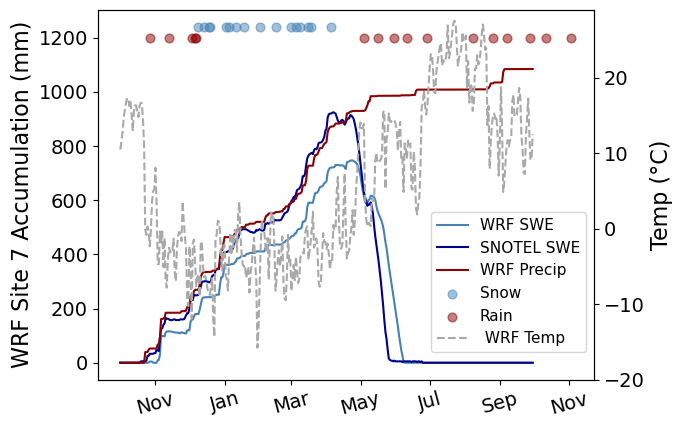

In [6]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
# Plot 'T2' as a line plot on the second y-axis
ax2.plot(precip.index, precip['T2'], label=' WRF Temp', color='darkgray', linestyle='dashed')
ax2.set_ylim([-20, 29])
# Plot 'SWE' and 'ACPRCP' as line plots on the first y-axis
ax.plot(precip.index, precip['SWE'], label='WRF SWE', color='steelblue')
ax.plot(precip.index, precip['SWE22'], label= 'SNOTEL SWE', color = 'darkblue')
ax.plot(precip.index, precip['ACPRCP'], label='WRF Precip', color='darkred')

# Plot 'Snow' and 'Rain' as scatter plots with specified marker size on the first y-axis
ax.scatter(precip.index, precip['Snow'], color='steelblue', s=40, label='Snow',
           edgecolors='steelblue', alpha=0.5)
ax.scatter(precip.index, precip['Rain'], color='darkred', s=40, label='Rain',
           edgecolors='darkred', alpha=0.5)

ax.set_ylabel('WRF Site 7 Accumulation (mm)', fontsize=16)
ax2.set_ylabel('Temp (°C)', fontsize=16)

ax.tick_params(axis='x', labelrotation=15, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.475),fontsize=11)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

### Sensativity Analysis for Cold vs Warm
### Snotel Data
### Elevation: 6100 ft / 1859 m (eq site: 7)

In [7]:
#Snotel Mores Creek Pass
sn1 = pd.read_csv('../Data/7.SN_WaterYear_2023.csv',parse_dates = [0])
sn = sn1.set_index('Date')
sn[300:340]
#take average between set dates for temp

,SWE_in,PREC_Accum_in,T_degC,TMAX_degC),TMIN_degC,TAVG_degC,SNWDepth_in
Date,,,,,,,
2023-07-28,0.0,44.4,13.3,25.1,12.0,18.1,0
2023-07-29,0.0,44.4,14.3,25.7,12.0,18.4,0
2023-07-30,0.0,44.4,14.5,25.7,12.9,18.7,0
2023-07-31,0.0,44.4,14.3,26.4,13.5,19.0,0


In [8]:
sn['discrete precip'] = np.diff(sn['PREC_Accum_in'], prepend=0)
sn.loc[sn.index[0], 'discrete precip'] = 0

In [9]:
sn = sn[sn['discrete precip'] > 0]
sn.head(3)

,SWE_in,PREC_Accum_in,T_degC,TMAX_degC),TMIN_degC,TAVG_degC,SNWDepth_in,discrete precip
Date,,,,,,,,
2022-10-22,0.0,0.5,4.9,13.9,4.9,8.6,0,0.5
2022-10-23,0.0,1.8,-2.0,5.1,-3.2,0.9,0,1.3
2022-10-25,0.5,2.4,-1.1,2.5,-5.9,-1.6,2,0.6


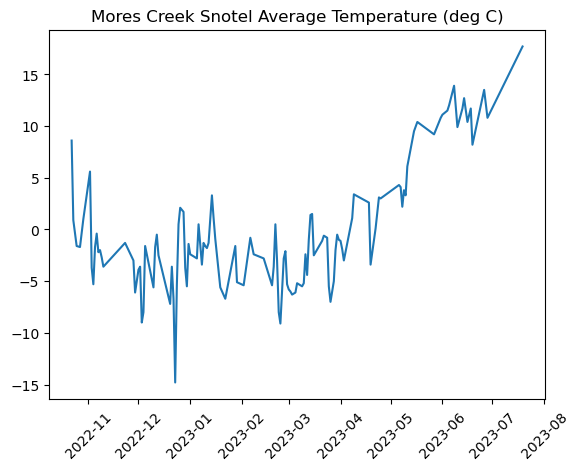

In [10]:
sn['TAVG_degC ']
sn['cold_season'] = sn['TAVG_degC ' ] < 0 
#2022-11-03 first day below 0 followed by over 20 days
# first day over 0 followed by 7+ rest of days = 2023-04-22

sn[0:40]
x = sn.index #plt.scatter(x,y,s=10,c='Type')
y = sn['TAVG_degC ']
plt.plot(x,y)
plt.xticks(rotation = 45)
plt.title('Mores Creek Snotel Average Temperature (deg C)');

In [11]:
a = sn['2022-10-05' : '2022-10-27']['TAVG_degC '].mean() # leave space after TAVG_degC
b = sn['2022-10-28' : '2022-11-13']['TAVG_degC '].mean()
c = sn['2022-11-14' : '2022-12-03']['TAVG_degC '].mean()
d = sn['2022-12-04' : '2022-12-19']['TAVG_degC '].mean()
q = sn['2022-12-20' : '2023-01-05']['TAVG_degC '].mean()
e = sn['2023-01-06' : '2023-01-18']['TAVG_degC '].mean()
f = sn['2023-01-19' : '2023-02-01']['TAVG_degC '].mean()
g = sn['2023-02-02' : '2023-02-15']['TAVG_degC '].mean()
h = sn['2023-02-16' : '2023-03-01']['TAVG_degC '].mean()
i = sn['2023-03-02' : '2023-03-18']['TAVG_degC '].mean()
j = sn['2023-03-19' : '2023-04-05']['TAVG_degC '].mean()
k = sn['2023-04-06' : '2023-04-17']['TAVG_degC '].mean()
l = sn['2023-04-18' : '2023-05-04']['TAVG_degC '].mean()
m = sn['2023-05-05' : '2023-05-16']['TAVG_degC '].mean()
n = sn['2023-05-17' : '2023-05-31']['TAVG_degC '].mean()
o = sn['2023-06-01' : '2023-06-11']['TAVG_degC '].mean()
p = sn['2023-06-12' : '2023-06-29']['TAVG_degC '].mean()

temp = [a,b,c,d,q,e,f,g,h,i,j,k,l,m,n,o,p]
temp

[np.float64(1.55),
 np.float64(-1.5000000000000002),
 np.float64(-4.483333333333333),
 np.float64(-3.3166666666666664),
 np.float64(-3.7846153846153845),
 np.float64(-0.6000000000000001),
 np.float64(-4.75),
 np.float64(-2.8499999999999996),
 np.float64(-4.459999999999999),
 np.float64(-3.475),
 np.float64(-2.4583333333333335),
 np.float64(2.25),
 np.float64(1.08),
 np.float64(4.757142857142857),
 np.float64(10.133333333333335),
 np.float64(11.68),
 np.float64(11.285714285714286)]

## Town Creek - Relative Humidity
Meta Data = 4500 ft : 1372 m (eq to site 3-4)  
43° 56' 00" 115° 55' 00"

In [12]:
t = pd.read_csv('../Data/8.Town_Creek_metdata.csv',parse_dates = [0])
tc = t.set_index('Date ')
tc.head(3)

,Year,Day of year,Avg Temp_F,Avg_maxtemp_f,avg_mintemp_F,avg_rel_humidity,max_rel_hum,min_rel_hum
Date,,,,,,,,
2022-10-01,2022,274,51.8,69,35,63,99,30
2022-10-02,2022,275,52.7,71,39,63,92,32
2022-10-03,2022,276,54.8,76,38,62,97,26


In [13]:
#xx = tc['2022-10-01' : '2022-10-04']['avg_rel_humidity'].mean()
aa = tc['2022-10-05' : '2022-10-27']['avg_rel_humidity'].mean() 
bb = tc['2022-10-28' : '2022-11-13']['avg_rel_humidity'].mean()
cc = tc['2022-11-14' : '2022-12-03']['avg_rel_humidity'].mean()
dd = tc['2022-12-04' : '2022-12-19']['avg_rel_humidity'].mean()
qq = tc['2022-12-20' : '2023-01-05']['avg_rel_humidity'].mean()
ee = tc['2023-01-06' : '2023-01-18']['avg_rel_humidity'].mean()
ff = tc['2023-01-19' : '2023-02-01']['avg_rel_humidity'].mean()
gg = tc['2023-02-02' : '2023-02-15']['avg_rel_humidity'].mean()
hh = tc['2023-02-16' : '2023-03-01']['avg_rel_humidity'].mean()
ii = tc['2023-03-02' : '2023-03-18']['avg_rel_humidity'].mean()
jj = tc['2023-03-19' : '2023-04-05']['avg_rel_humidity'].mean()
kk = tc['2023-04-06' : '2023-04-17']['avg_rel_humidity'].mean()
ll = tc['2023-04-18' : '2023-05-04']['avg_rel_humidity'].mean()
mm = tc['2023-05-05' : '2023-05-16']['avg_rel_humidity'].mean()
nn = tc['2023-05-17' : '2023-05-31']['avg_rel_humidity'].mean()
oo = tc['2023-06-01' : '2023-06-11']['avg_rel_humidity'].mean()
pp = tc['2023-06-12' : '2023-06-29']['avg_rel_humidity'].mean()

rel_humidity = [aa,bb,cc,dd,qq,ee,ff,gg,hh,ii,jj,kk,ll,mm,nn,oo,pp]
tc.head()

,Year,Day of year,Avg Temp_F,Avg_maxtemp_f,avg_mintemp_F,avg_rel_humidity,max_rel_hum,min_rel_hum
Date,,,,,,,,
2022-10-01,2022,274,51.8,69,35,63,99,30
2022-10-02,2022,275,52.7,71,39,63,92,32
2022-10-03,2022,276,54.8,76,38,62,97,26
2022-10-04,2022,277,56.7,78,39,56,96,23
2022-10-05,2022,278,57.7,80,40,51,82,21


### Boise Airport = 875 m (Site 1)
### Town Creek = 1371 m (Site 3-4)
### Snotel = 1859 m (Site 7)
### BOgus = 1932 m (Site 8)
### Pilot Peak = 2482 m (Site 10)  
values = [922,1160,1266,1455,1755,1780,1860,2036,2145,2316,'NaN']

In [14]:
wx = pd.read_csv('../Data/9.met_station_temps.csv',parse_dates = [0])
wx.head()

,Date,Avg Temp_TC,Avg_Temp_Snotel,Avg_Temp_Boise,Avg_Temp_Bogus
0,2022-10-01,11.0,7.3,14.2,7.5
1,2022-10-02,11.5,9.2,18.1,8.1
2,2022-10-03,12.7,8.9,17.8,9.0
3,2022-10-04,13.7,10.8,19.4,9.4
4,2022-10-05,14.3,11.8,19.7,10.6


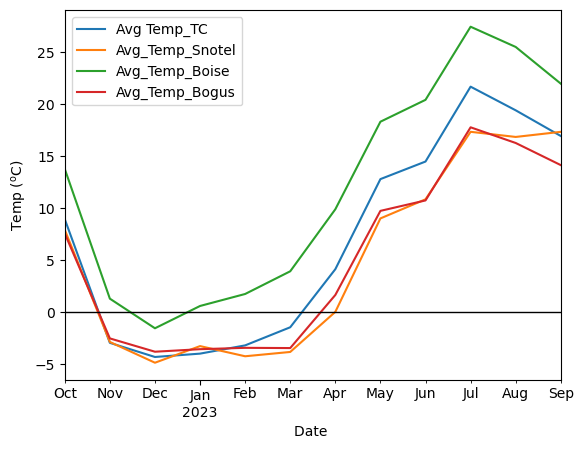

In [15]:
grouped = wx.groupby(pd.Grouper(key='Date ', freq='ME'))

monthly_temps = grouped.mean()

monthly_temps.plot()
plt.axhline(y=0, linestyle='-',linewidth=1, c='black')
plt.ylabel (r'Temp ($\mathregular{^{o}}$C)');

In [16]:
pp = pd.read_csv('../Data/10.PP_weather_FY22.csv')
pp.head(5)

,DateTime,Temperature,Dew Point,Relative Humidity
0,9/30/2022 18:06,7.222,-0.11,60
1,10/1/2022 2:51,2.222,-1.99,74
2,10/1/2022 11:36,10.000,0.77,53
3,10/1/2022 20:21,6.667,-0.40,61
4,10/2/2022 5:06,5.000,0.31,72


In [17]:
pp['DateTime'] = pd.to_datetime(pp['DateTime'])
pp['Temperature'] = pd.to_numeric(pp['Temperature'])

In [18]:
grouped_pp = pp.groupby(pd.Grouper(key='DateTime', freq='ME'))
monthly_temps_pp = grouped_pp.mean()
monthly_temps_pp

,Temperature,Dew Point,Relative Humidity
DateTime,,,
2022-09-30,7.222000,-0.110000,60.000000
2022-10-31,6.287647,-6.545294,46.976471
2022-11-30,-5.853622,-12.603537,66.597561
2022-12-31,-7.745153,-9.896235,85.917647
2023-01-31,-8.000047,-10.358588,84.600000
2023-02-28,-7.077909,-13.045844,69.155844
2023-03-31,-7.843940,-10.250476,84.595238
2023-04-30,-1.787120,-8.030602,68.216867
2023-05-31,7.056893,-1.790119,57.738095


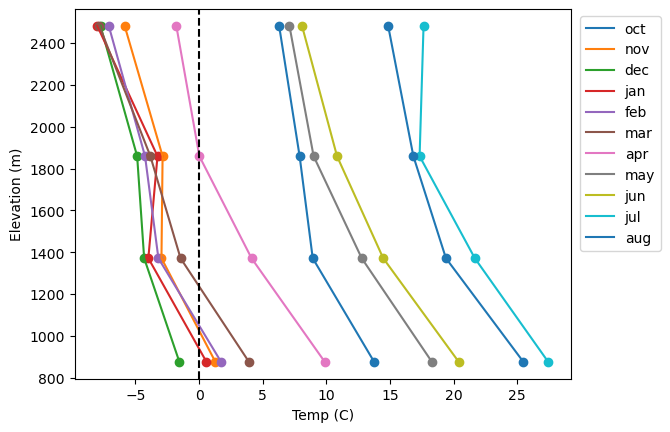

In [19]:
# Seperate monthly temps and assign elevation to each location
# Without Bogus since it is not in the Watershed and skews the data 
locations = ['Boise', 'Town Creek', 'Snotel', 'PP']
y = np.array([875, 1371, 1859,  2482])
october = np.array([13.76, 8.93, 7.9,  6.29])
nov = np.array([1.28, -2.959, -2.87,  -5.85])
dec = np.array([(-1.55), (-4.3193), (-4.87),  -7.75])
jan = np.array([(0.58), (-3.99), (-3.27),  -8])
feb = np.array([1.73, -3.2, -4.25,  -7.1])
mar = np.array([3.92, -1.46, -3.83,  -7.84])
apr = np.array([9.88, 4.12, 0.02,  -1.79])
may = np.array([18.3, 12.78, 9.0, 7.1])
jun = np.array([20.41, 14.47, 10.84,  8.09])
jul = np.array([27.44, 21.67, 17.33,  17.64])
aug = np.array([25.49, 19.40, 16.84,  14.86])

# Create a list of months and corresponding temperature arrays
months = ['oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug']
temps = [october, nov, dec, jan, feb, mar, apr, may, jun, jul, aug]

# Plot line plots with scatter points and labels
fig, ax = plt.subplots()

for month, temp in zip(months, temps):
    ax.plot(temp, y, label=month)
    ax.scatter(temp, y)  # Scatter points
    
    # Add labels for each location
    #for loc, x, y_val in zip(locations, temp, y):
     #   ax.text(x, y_val, loc, ha='left', va='center', color='black', fontsize=8)

plt.xlabel('Temp (C)')
plt.ylabel('Elevation (m)')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
plt.axvline(x=0, linestyle='dashed', c='black');

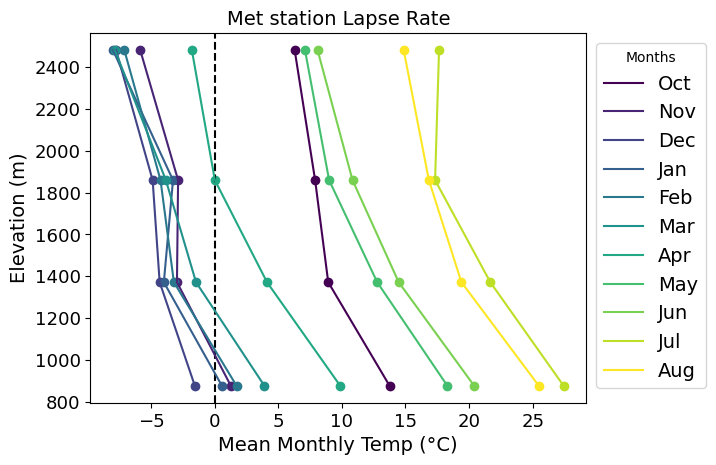

In [20]:
# Seperate monthly temps and assign elevation to each location
locations = ['Boise', 'Town Creek', 'Snotel', 'PP']
abbreviations = ['Bs', 'TC', 'Sn',  'PP']
y = np.array([875, 1371, 1859,  2482])
october = np.array([13.76, 8.93, 7.9,  6.29])
nov = np.array([1.28, -2.959, -2.87,  -5.85])
dec = np.array([(-1.55), (-4.3193), (-4.87),  -7.75])
jan = np.array([(0.58), (-3.99), (-3.27),  -8])
feb = np.array([1.73, -3.2, -4.25,  -7.1])
mar = np.array([3.92, -1.46, -3.83,  -7.84])
apr = np.array([9.88, 4.12, 0.02,  -1.79])
may = np.array([18.3, 12.78, 9.0, 7.1])
jun = np.array([20.41, 14.47, 10.84,  8.09])
jul = np.array([27.44, 21.67, 17.33,  17.64])
aug = np.array([25.49, 19.40, 16.84,  14.86])

# Create a list of months and corresponding temperature arrays
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
temps = [october, nov, dec, jan, feb, mar, apr, may, jun, jul, aug]

# Plot line plots with text labels for locations
fig, ax = plt.subplots()

# Use viridis colormap for the lines
colors = cm.viridis(np.linspace(0, 1, len(months)))
plt.axvline(x=0, linestyle='dashed', c='black')
for month, temp, color in zip(months, temps, colors):
    ax.plot(temp, y, label=month, color=color)
    ax.scatter(temp, y, color=color)  # Scatter points
    
# Add text labels for each location
#for loc, abbreviation, y_val in zip(locations, abbreviations, y):
 #   ax.text(0, y_val, abbreviation, ha='right', va='center', color='black', fontsize=12)

# Set x and y-axis tick label fontsize
ax.tick_params(axis='both', which='major', labelsize=13)    
    
plt.xlabel('Mean Monthly Temp (°C)', fontsize=14)
plt.ylabel('Elevation (m)',fontsize=14)
plt.title('Met station Lapse Rate',fontsize=14)

# Add legend for months and locations inside the plot
ax.legend(loc='upper left', title='Months', bbox_to_anchor=(1, 1), fontsize=14)
plt.show()

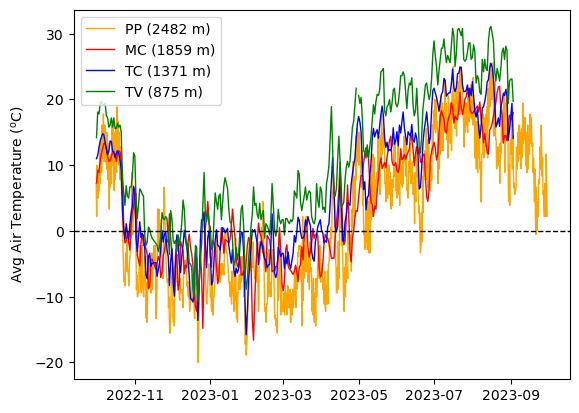

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(pp['DateTime'], pp['Temperature'], c='orange', label='PP (2482 m)',linewidth=1)
ax1.plot(wx['Date '], wx['Avg_Temp_Snotel'], c='r', label='MC (1859 m)',linewidth=1)
ax1.plot(wx['Date '], wx['Avg Temp_TC'], c='b', label='TC (1371 m)',linewidth=1)
ax1.plot(wx['Date '], wx['Avg_Temp_Boise'], c='g', label='TV (875 m)',linewidth=1)

plt.legend(loc='upper left')
plt.ylabel (r'Avg Air Temperature ($\mathregular{^{o}}$C)')
plt.axhline(y=0, linestyle='dashed',linewidth=1, c='black')
plt.show()

In [22]:
wrf_T = pd.read_csv('../Data/11.Temp_allsites_weekly.csv',parse_dates = [0])
wrf_T.set_index('date', inplace=True)
wrf_T.head(2)

,RC_01,RC_02,RC_03,RC_04,RC_05,RC_06,RC_07,RC_08,RC_09,RC_10,IB_05,IB_06,IB_08
date,,,,,,,,,,,,,
2022-10-02,16.511902,14.570831,12.501190,10.821808,12.141052,10.947571,10.073700,10.407105,8.426147,5.727234,10.947571,10.947571,8.426147
2022-10-09,20.721832,19.005950,16.583832,15.097412,16.159485,15.008057,14.300598,14.594574,13.593323,10.425446,15.008057,15.008057,13.593323


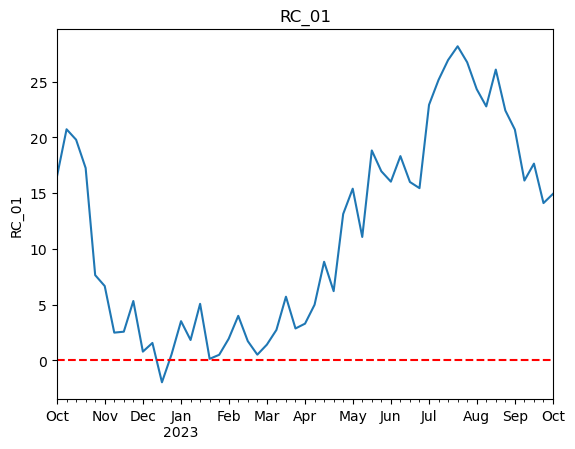

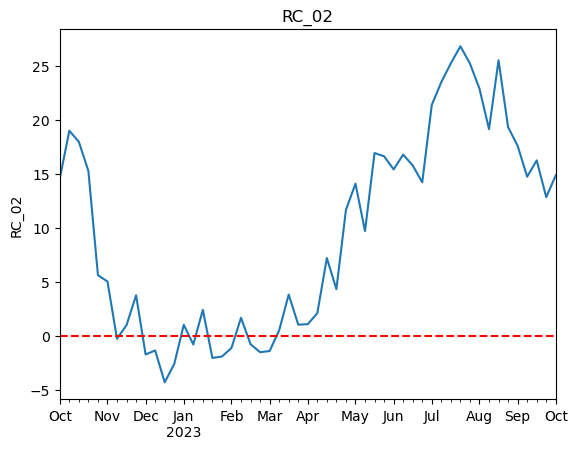

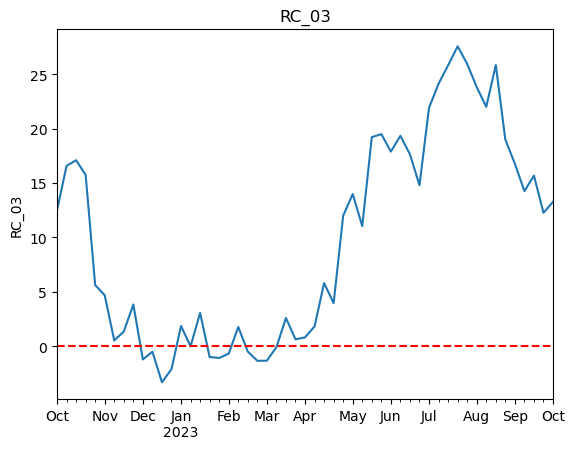

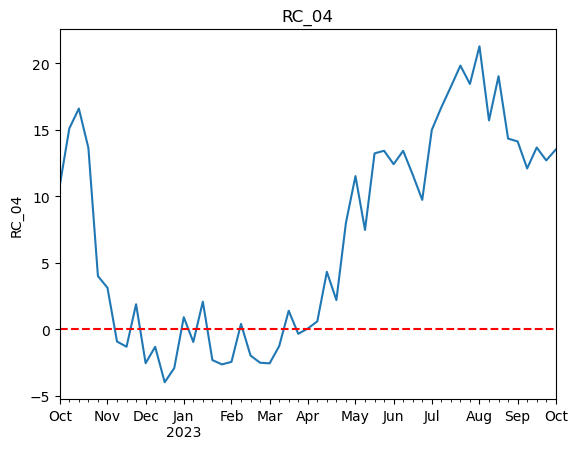

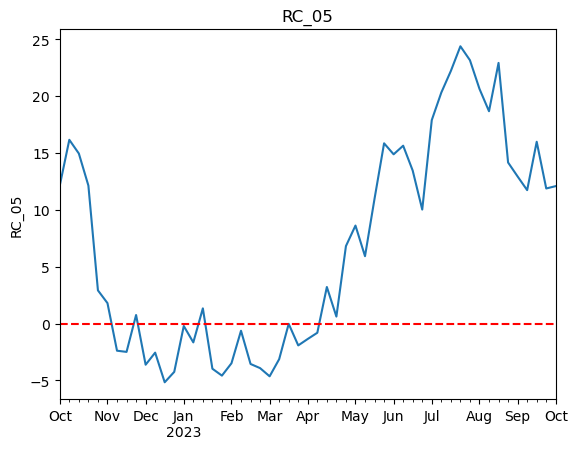

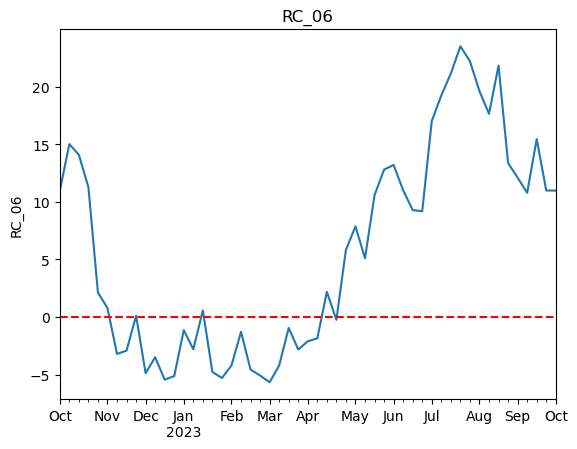

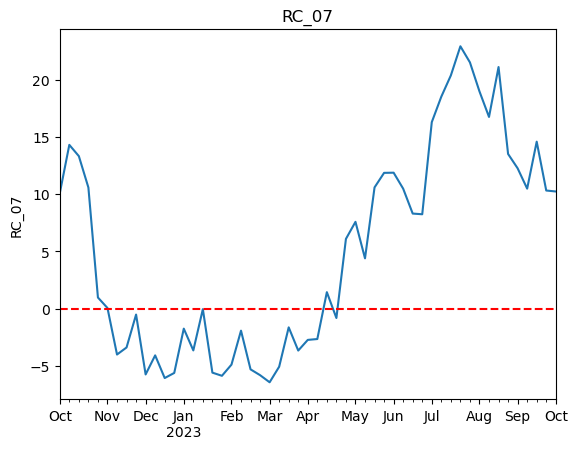

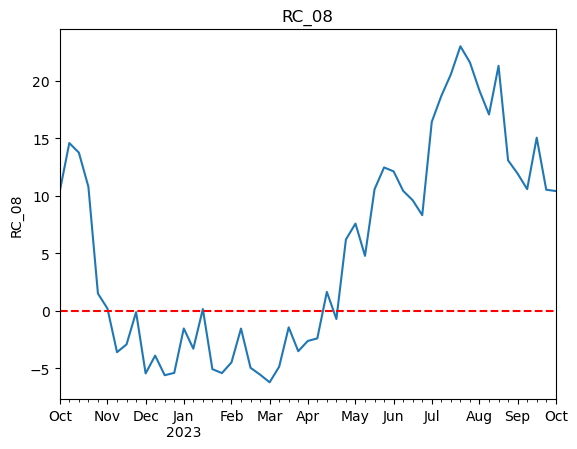

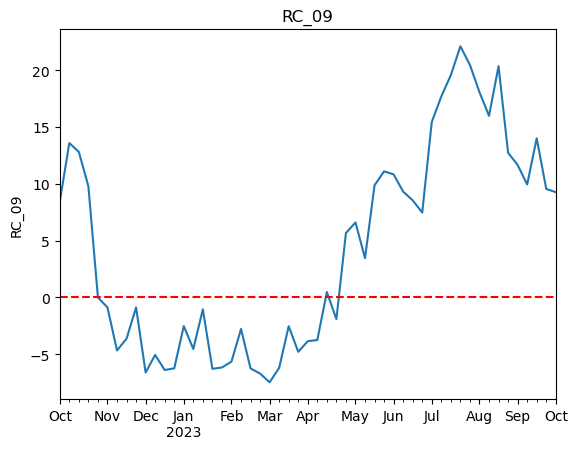

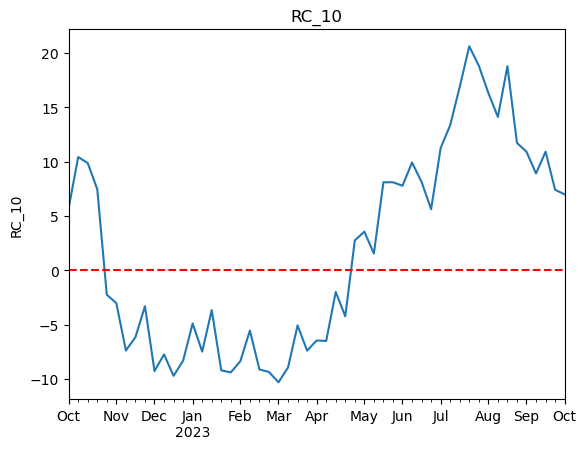

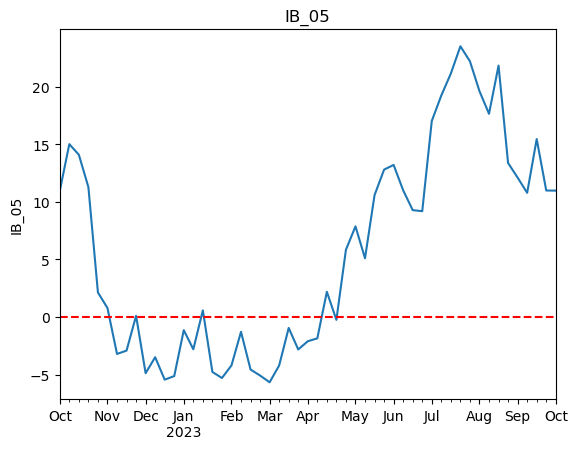

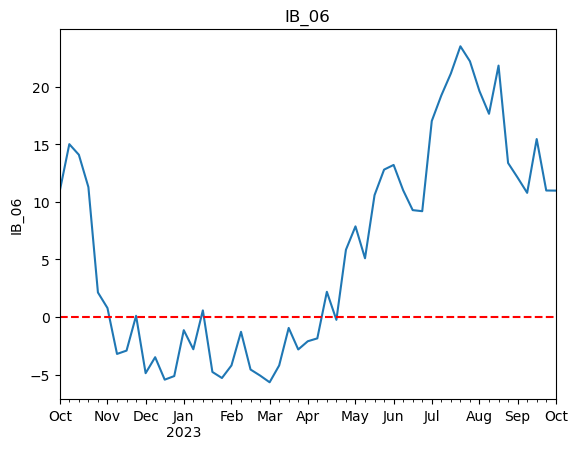

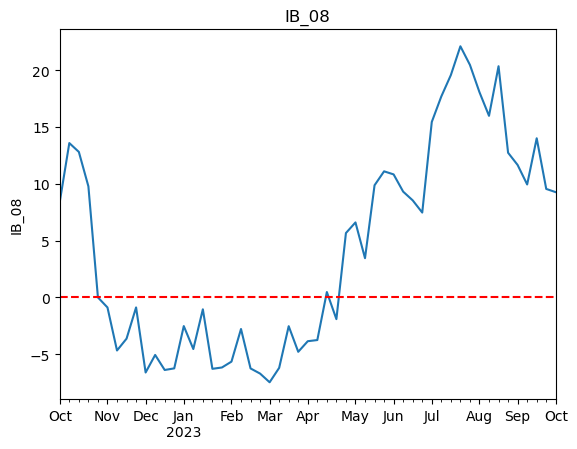

In [23]:
for col in wrf_T.columns:
    plt.figure()  # Creates a new figure
    wrf_T[col].plot(kind='line')  # Plots the column as a line plot
    plt.axhline(0, color='r', linestyle='--')  # Adds a red dotted horizontal line at y=0
    plt.title(col)  # Sets the title of the plot as the column name
    plt.xlabel('')  # Sets the x-axis label as 'Date'
    plt.ylabel(col)  # Sets the y-axis label as the column name

In [24]:
# List of columns to be removed
cols_to_remove = ['IB_05', 'IB_06', 'IB_08']

# Remove the columns
wrf_T = wrf_T.drop(cols_to_remove, axis=1)
wrf_T.head(3)

,RC_01,RC_02,RC_03,RC_04,RC_05,RC_06,RC_07,RC_08,RC_09,RC_10
date,,,,,,,,,,
2022-10-02,16.511902,14.570831,12.501190,10.821808,12.141052,10.947571,10.073700,10.407105,8.426147,5.727234
2022-10-09,20.721832,19.005950,16.583832,15.097412,16.159485,15.008057,14.300598,14.594574,13.593323,10.425446
2022-10-16,19.784332,17.980713,17.103363,16.592620,14.952393,14.087524,13.315277,13.761566,12.813141,9.871948


<Figure size 640x480 with 0 Axes>

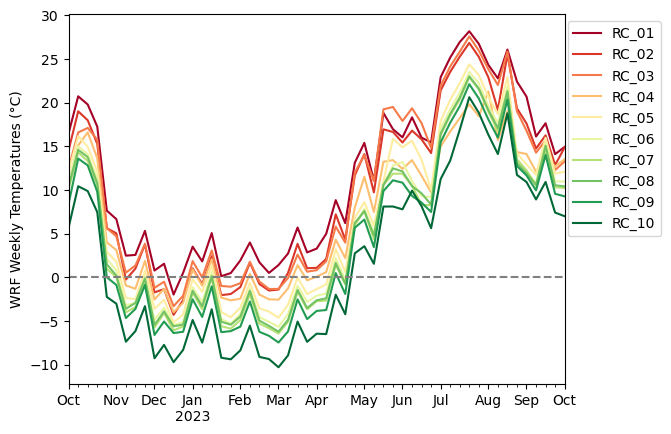

In [25]:
plt.figure() 
wrf_T.plot(kind='line',colormap='RdYlGn')  # Plots all columns
plt.axhline(0, color='gray', linestyle='--')  # Adds line at y=0 , change to behind
plt.xlabel('')  
plt.ylabel('WRF Weekly Temperatures (°C)') 
plt.legend(loc='upper center',bbox_to_anchor=(1.1, 1));

In [26]:
#Lets do monthly mean air temperature for all sites based on their elevational weight

In [27]:
monthly_mean_df = wrf_T.resample('ME').mean()
monthly_mean = monthly_mean_df.transpose()
monthly_mean.head(3)

date,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31
RC_01,16.380042,4.253670,0.215485,2.200751,2.034317,3.168777,7.284009,15.557343,16.441384,25.979498,23.893608,17.138199,14.930756
RC_02,14.491711,2.382950,-2.494301,-0.261658,-0.431023,0.995560,5.278796,14.350555,15.560242,24.446142,21.734116,15.366768,14.876862
RC_03,13.513483,2.604126,-1.782234,0.571393,-0.181877,0.458015,4.883502,15.941910,17.424492,25.086249,22.672623,14.750794,13.276459


In [28]:
# Create a dictionary mapping site names to elevations
elevation_dict = {
    'RC_01': 922,
    'RC_02': 1160,
    'RC_03': 1266,
    'RC_04': 1455,
    'RC_05': 1755,
    'RC_06': 1780,
    'RC_07': 1860,
    'RC_08': 2036,
    'RC_09': 2145,
    'RC_10': 2316
}

# Create a new 'Elevation' column in the DataFrame
monthly_mean['Elevation'] = monthly_mean.index.map(elevation_dict)
monthly_mean.head(1)

date,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,Elevation
RC_01,16.380042,4.25367,0.215485,2.200751,2.034317,3.168777,7.284009,15.557343,16.441384,25.979498,23.893608,17.138199,14.930756,922


In [29]:
# List of new column names
new_column_names = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Elevation']

# Ensure the list has the same length as the number of columns in your DataFrame
len(new_column_names) == len(monthly_mean.columns)
monthly_mean.columns = new_column_names
monthly_mean.head(3)

,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Elevation
RC_01,16.380042,4.253670,0.215485,2.200751,2.034317,3.168777,7.284009,15.557343,16.441384,25.979498,23.893608,17.138199,14.930756,922
RC_02,14.491711,2.382950,-2.494301,-0.261658,-0.431023,0.995560,5.278796,14.350555,15.560242,24.446142,21.734116,15.366768,14.876862,1160
RC_03,13.513483,2.604126,-1.782234,0.571393,-0.181877,0.458015,4.883502,15.941910,17.424492,25.086249,22.672623,14.750794,13.276459,1266


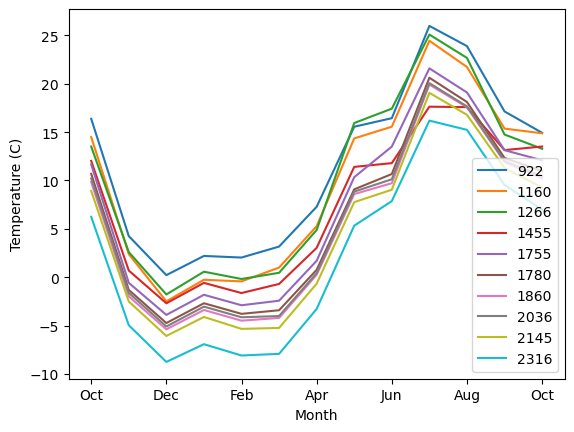

In [30]:
monthly_mean.set_index('Elevation', inplace=True)

# Transpose the DataFrame to have months as columns and elevation as index
df_transposed = monthly_mean.transpose()

# Plot each month
for column in df_transposed.columns:
    df_transposed[column].plot(label=column)

plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend(loc='best')
plt.show()

In [31]:
a = sn['2022-10-05' : '2022-10-27']['TAVG_degC '].mean() 
b = sn['2022-10-28' : '2022-11-13']['TAVG_degC '].mean()
c = sn['2022-11-14' : '2022-12-03']['TAVG_degC '].mean()
d = sn['2022-12-04' : '2022-12-19']['TAVG_degC '].mean()
q = sn['2022-12-20' : '2023-01-05']['TAVG_degC '].mean()
e = sn['2023-01-06' : '2023-01-18']['TAVG_degC '].mean()
f = sn['2023-01-19' : '2023-02-01']['TAVG_degC '].mean()
g = sn['2023-02-02' : '2023-02-15']['TAVG_degC '].mean()
h = sn['2023-02-16' : '2023-03-01']['TAVG_degC '].mean()
i = sn['2023-03-02' : '2023-03-18']['TAVG_degC '].mean()
j = sn['2023-03-19' : '2023-04-05']['TAVG_degC '].mean()
k = sn['2023-04-06' : '2023-04-17']['TAVG_degC '].mean()
l = sn['2023-04-18' : '2023-05-04']['TAVG_degC '].mean()
m = sn['2023-05-05' : '2023-05-16']['TAVG_degC '].mean()
n = sn['2023-05-17' : '2023-05-31']['TAVG_degC '].mean()
o = sn['2023-06-01' : '2023-06-11']['TAVG_degC '].mean()
p = sn['2023-06-12' : '2023-06-29']['TAVG_degC '].mean()

temp = [a,b,c,d,q,e,f,g,h,i,j,k,l,m,n,o,p]
temp;

### TownCreek MetaData - Moving Average Temperature  
Town Creek = 1371 m (Site 3-4)

In [32]:
wx = wx.set_index('Date ')

In [33]:
# Calculate the 7-day moving average
wx_window = wx.rolling(window=7).mean()
wx_window.head(8)

,Avg Temp_TC,Avg_Temp_Snotel,Avg_Temp_Boise,Avg_Temp_Bogus
Date,,,,
2022-10-01,NaN,NaN,NaN,NaN
2022-10-02,NaN,NaN,NaN,NaN
2022-10-03,NaN,NaN,NaN,NaN
2022-10-04,NaN,NaN,NaN,NaN
2022-10-05,NaN,NaN,NaN,NaN
2022-10-06,NaN,NaN,NaN,NaN
2022-10-07,13.228571,10.557143,18.228571,9.757143
2022-10-08,13.571429,11.414286,18.971429,10.385714


In [34]:
columns = ['Avg Temp_TC', 'Avg_Temp_Snotel']  

for col in columns:
    # Calculate the 7-day moving average
    wx[col + '_MA7'] = wx[col].rolling(window=7).mean()

    # Classify every value above zero degrees as one and everything below as zero
    wx[col + '_MA7_C'] = wx[col + '_MA7'].apply(lambda x: 1 if x > 0 else 0 if pd.notnull(x) else np.nan)
    
wx.columns

Index(['Avg Temp_TC', 'Avg_Temp_Snotel', 'Avg_Temp_Boise', 'Avg_Temp_Bogus',
       'Avg Temp_TC_MA7', 'Avg Temp_TC_MA7_C', 'Avg_Temp_Snotel_MA7',
       'Avg_Temp_Snotel_MA7_C'],
      dtype='object')

In [35]:
columns = ['Avg Temp_TC_MA7_C', 'Avg_Temp_Snotel_MA7_C']  

for col in columns:
    # Find the date of the first zero
    first_zero_date = wx[wx[col] == 0].index.min()
    print(f"The first zero in {col} is on date: {first_zero_date}")

    # Find the date of the last zero
    last_zero_date = wx[wx[col] == 0].index.max()
    print(f"The last zero in {col} is on date: {last_zero_date}")


The first zero in Avg Temp_TC_MA7_C is on date: 2022-11-09 00:00:00
The last zero in Avg Temp_TC_MA7_C is on date: 2023-04-07 00:00:00
The first zero in Avg_Temp_Snotel_MA7_C is on date: 2022-10-29 00:00:00
The last zero in Avg_Temp_Snotel_MA7_C is on date: 2023-04-30 00:00:00
